<a href="https://colab.research.google.com/github/praveen101323/v/blob/main/ml_car_supervised_home_work_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats

In [4]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Owner', ylabel='count'>

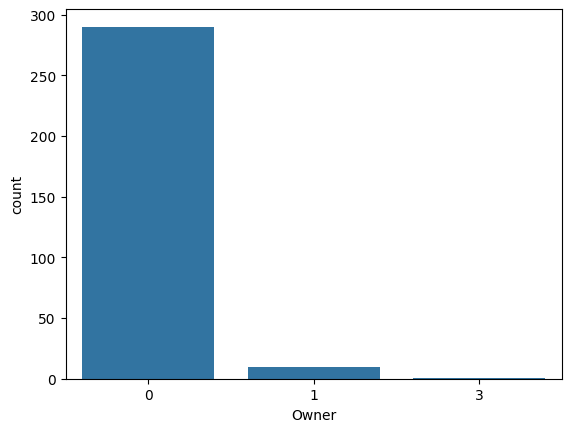

In [8]:
sns.countplot(x = 'Owner',data = df)

<Axes: xlabel='Selling_Price'>

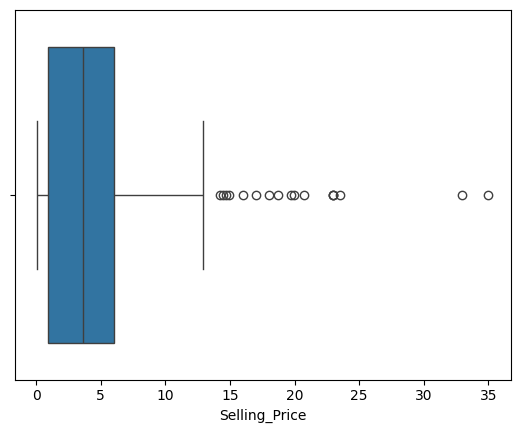

In [9]:
sns.boxplot(x = 'Selling_Price',data = df)

In [10]:
q1 = df['Selling_Price'].quantile(0.25)
q3 = df['Selling_Price'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr


In [11]:
df2=df[(df.Selling_Price>lower)&(df.Selling_Price<upper)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       284 non-null    object 
 1   Year           284 non-null    int64  
 2   Selling_Price  284 non-null    float64
 3   Present_Price  284 non-null    float64
 4   Kms_Driven     284 non-null    int64  
 5   Fuel_Type      284 non-null    object 
 6   Seller_Type    284 non-null    object 
 7   Transmission   284 non-null    object 
 8   Owner          284 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 22.2+ KB


<Axes: xlabel='Selling_Price'>

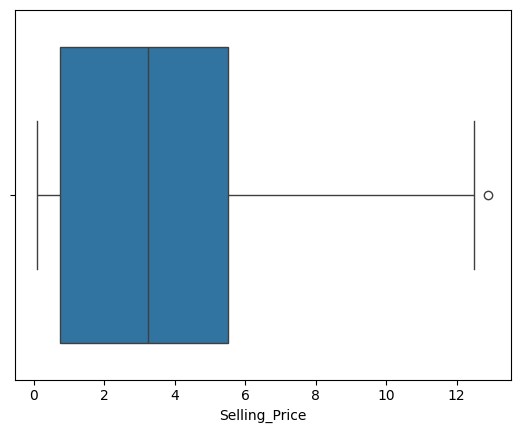

In [12]:
sns.boxplot(x= 'Selling_Price',data=df2)

In [13]:
df1 = df.select_dtypes('number')
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [14]:
df1.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<Axes: >

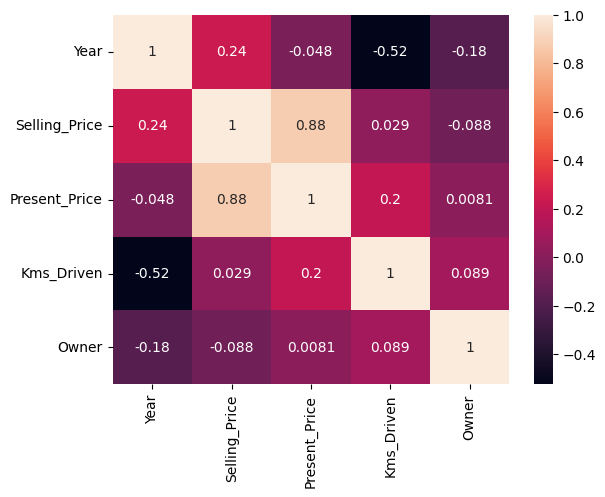

In [15]:
sns.heatmap(df1.corr(),annot = True)

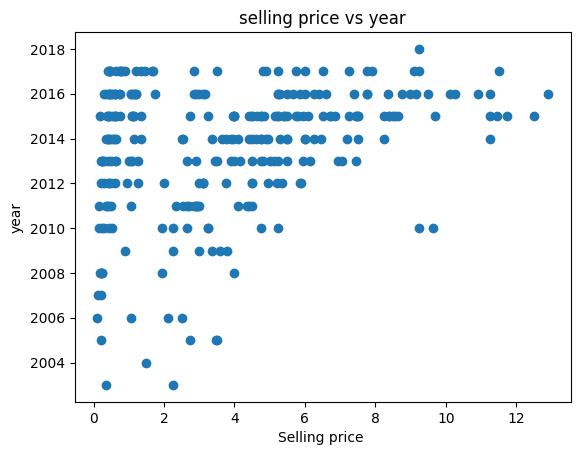

In [16]:
plt.scatter(x = 'Selling_Price', y = 'Year', data = df2)
plt.xlabel('Selling price ')
plt.ylabel('year')
plt.title('selling price vs year')
plt.show()


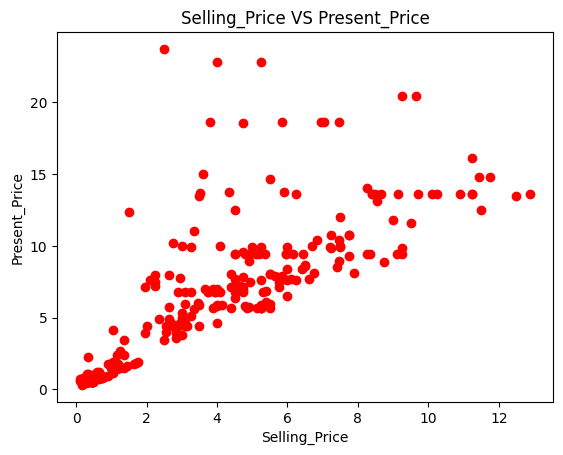

In [17]:
plt.scatter(x = 'Selling_Price',y = 'Present_Price',data=df2,color='red')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.title('Selling_Price VS Present_Price')
plt.show()

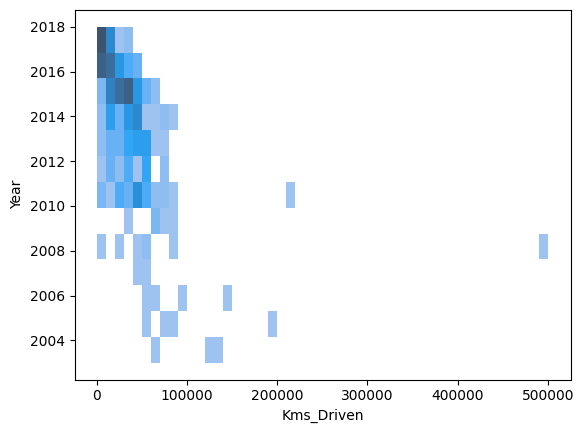

In [18]:
sns.histplot(x='Kms_Driven', y='Year', data=df2)
plt.show()

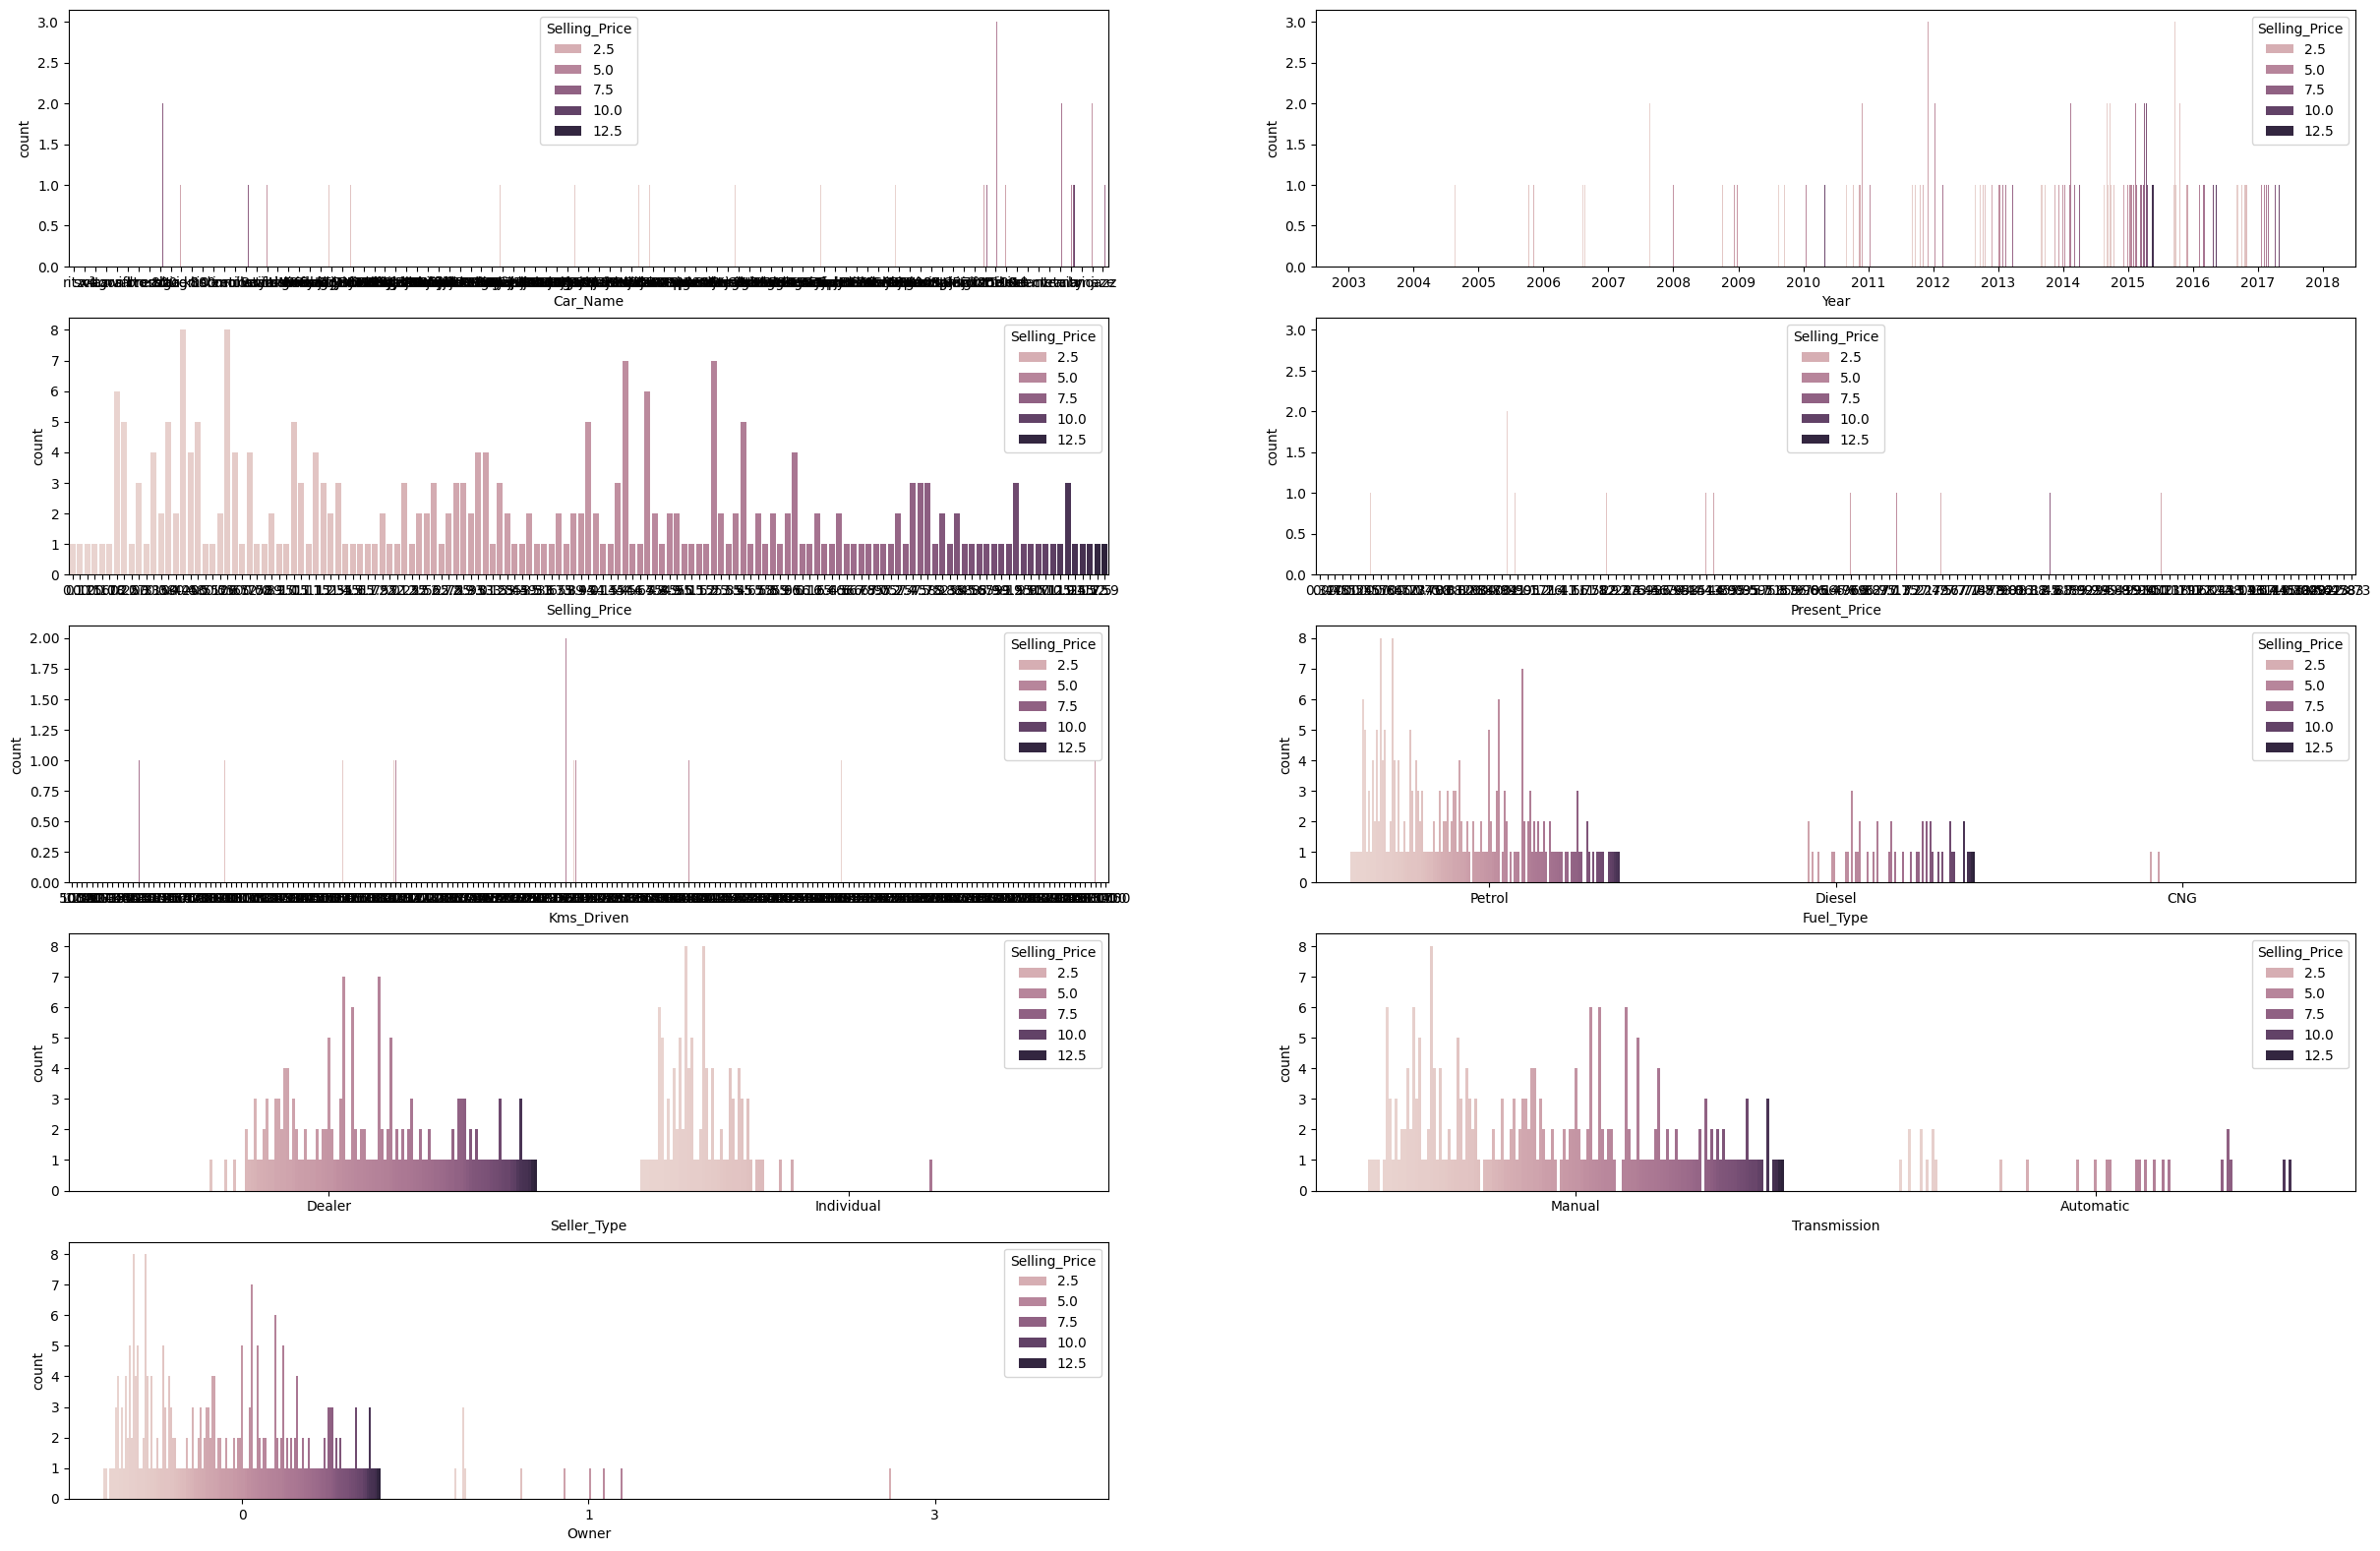

In [19]:
x = df2
plt.figure(figsize=(30,40))
for i , col in enumerate(x,1):
  plt.subplot(10,2,i)
  sns.countplot(data = x,hue ='Selling_Price',  x = col)

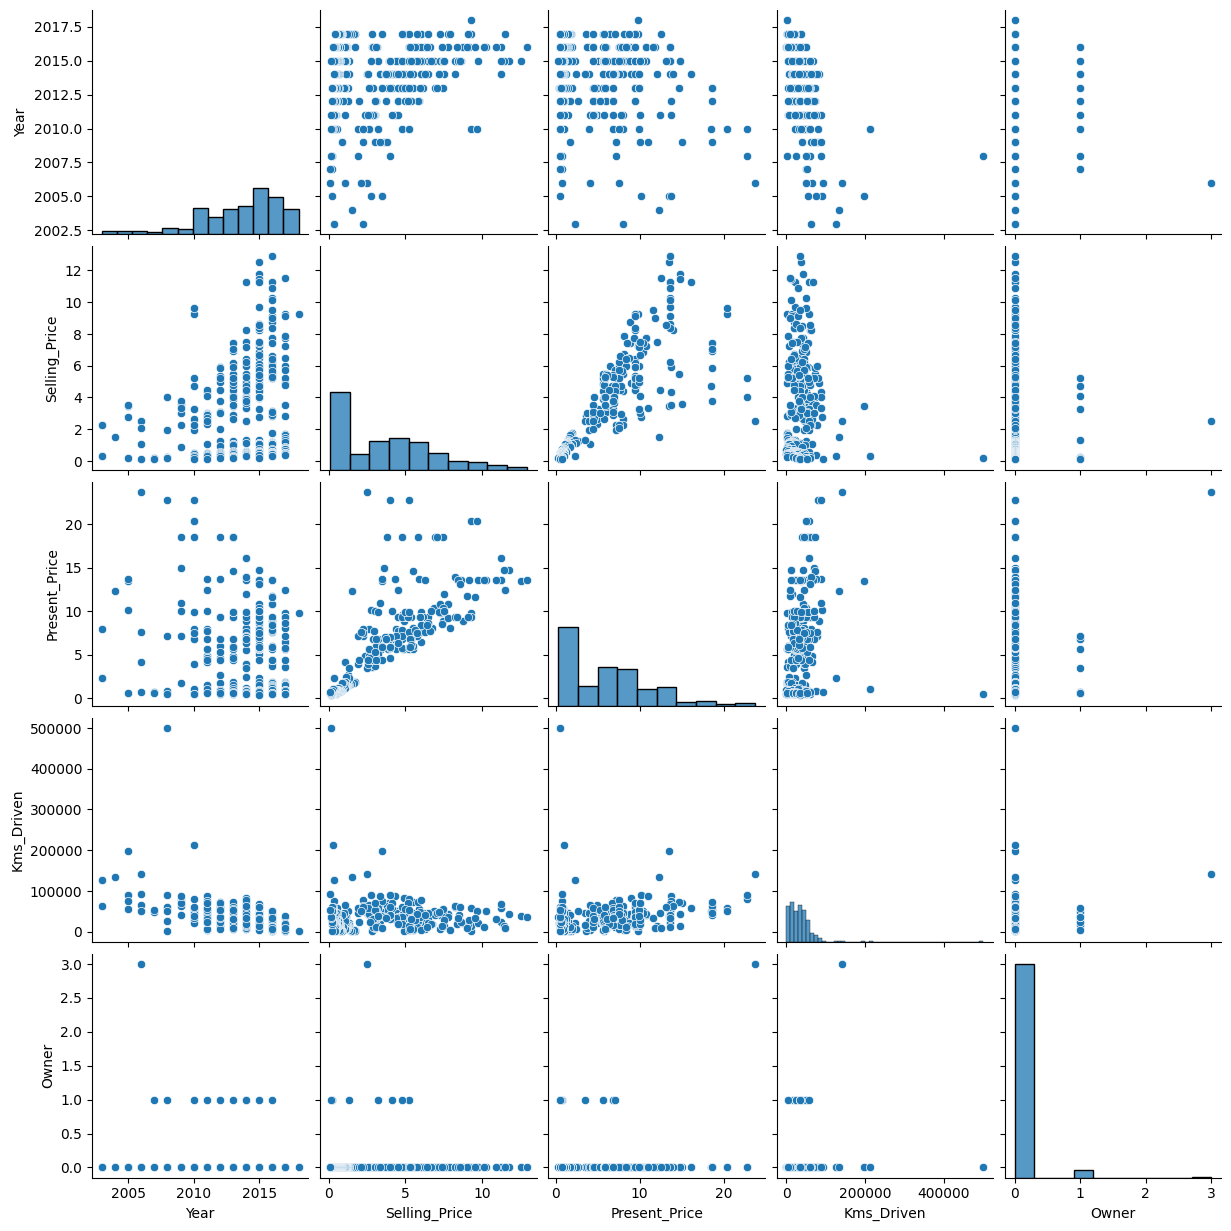

In [20]:
sns.pairplot(df2)

<Axes: xlabel='Selling_Price', ylabel='Count'>

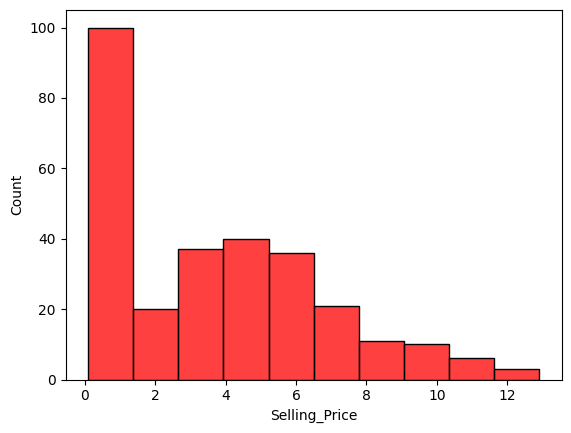

In [21]:
sns.histplot(x='Selling_Price',data=df2,color = 'red')

In [22]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# MACHINE LEARNING

In [23]:
le=LabelEncoder()
df2['Car_Name']=le.fit_transform(df2['Car_Name'])
df2['Fuel_Type']=le.fit_transform(df2['Fuel_Type'])
df2['Seller_Type']=le.fit_transform(df2['Seller_Type'])
df2['Transmission']=le.fit_transform(df2['Transmission'])

<ipython-input-23-f4e71eb678ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Car_Name']=le.fit_transform(df2['Car_Name'])
<ipython-input-23-f4e71eb678ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Fuel_Type']=le.fit_transform(df2['Fuel_Type'])
<ipython-input-23-f4e71eb678ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [24]:
x = df2.drop('Selling_Price',axis = 1)
y = df2['Selling_Price']

# Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.80 , random_state=23)
x_train,x_test,y_train,y_test

(     Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
 191        10  2012          0.570       25000          2            1   
 168        34  2013          0.730       12000          2            1   
 194        18  2008          0.787       50000          2            1   
 112        41  2014          2.400        7000          2            1   
 182        33  2013          0.580       30000          2            1   
 ..        ...   ...            ...         ...        ...          ...   
 254        69  2013          9.900       54242          2            0   
 31         89  2011          4.890       54200          2            0   
 40         65  2016          7.870       24524          2            0   
 247        93  2015          9.400       36000          2            0   
 100        49  2016          1.900        3000          2            1   
 
      Transmission  Owner  
 191             1      1  
 168             1      0  
 194          

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([ 7.44783015,  4.50628143,  1.97369386,  4.51897217,  1.11155817,
       -0.73067086,  3.136684  ,  0.10955173,  2.78173131,  6.20593659,
       -2.47074052, -0.6608951 ,  2.20083032,  4.50315162,  7.94710442,
        5.64935913,  1.76150783,  2.24790641,  4.66007063,  1.63522965,
        5.67809575,  3.2680967 , -0.63182038,  4.48255026,  7.29888527,
        4.43803069,  1.33666375,  3.65391577,  4.11954523,  0.49467862,
       -0.12777265,  7.6381156 ,  9.16729173,  6.59223869,  5.77785984,
        4.29198976,  3.12991096,  7.54852963,  2.16792801,  9.24125887,
       -0.63448991,  8.19037963,  1.63199801, -5.26696682,  1.66176146,
        7.09401283,  0.89599824,  7.29688285, -2.21436584,  5.66383377,
        5.42766247,  1.36130025,  5.94036594,  1.70394754,  1.04382243,
        1.02873047,  8.63237123])

In [27]:
mse = mean_squared_error(y_test,y_pred)
mse

2.0663889859388167

In [28]:
r2 = r2_score(y_test,y_pred)
r2

0.8090067934307414

In [29]:
model.score(x_train,y_train)

0.8339935711625663

In [30]:
model.score(x_test,y_test)

0.8090067934307414

# DECISION TREE REGRESSION

In [31]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
y_pred1 = dtmodel.predict(x_test)
y_pred1

array([ 8.5 ,  4.1 ,  0.8 ,  5.25,  0.4 ,  0.25,  2.75,  0.42,  3.  ,
        4.5 ,  0.1 ,  0.95,  3.  ,  3.1 , 11.25,  6.1 ,  0.78,  2.5 ,
        3.9 ,  0.75,  5.8 ,  2.35,  0.2 ,  3.1 , 10.11,  3.  ,  1.11,
        1.95,  3.  ,  0.25,  0.45,  9.5 ,  4.75,  6.25,  5.25,  2.85,
        2.9 ,  8.65,  2.55,  4.75,  0.45,  9.25,  0.45,  0.15,  0.8 ,
        8.35,  0.65,  7.5 ,  0.12,  3.8 ,  5.5 ,  0.48,  6.  ,  0.45,
        0.5 ,  0.51,  7.05])

In [33]:
mse1 = mean_squared_error(y_test,y_pred1)
mse1

1.041219298245614

In [34]:
r2_1 = r2_score(y_test,y_pred1)
r2_1

0.9037616761089283

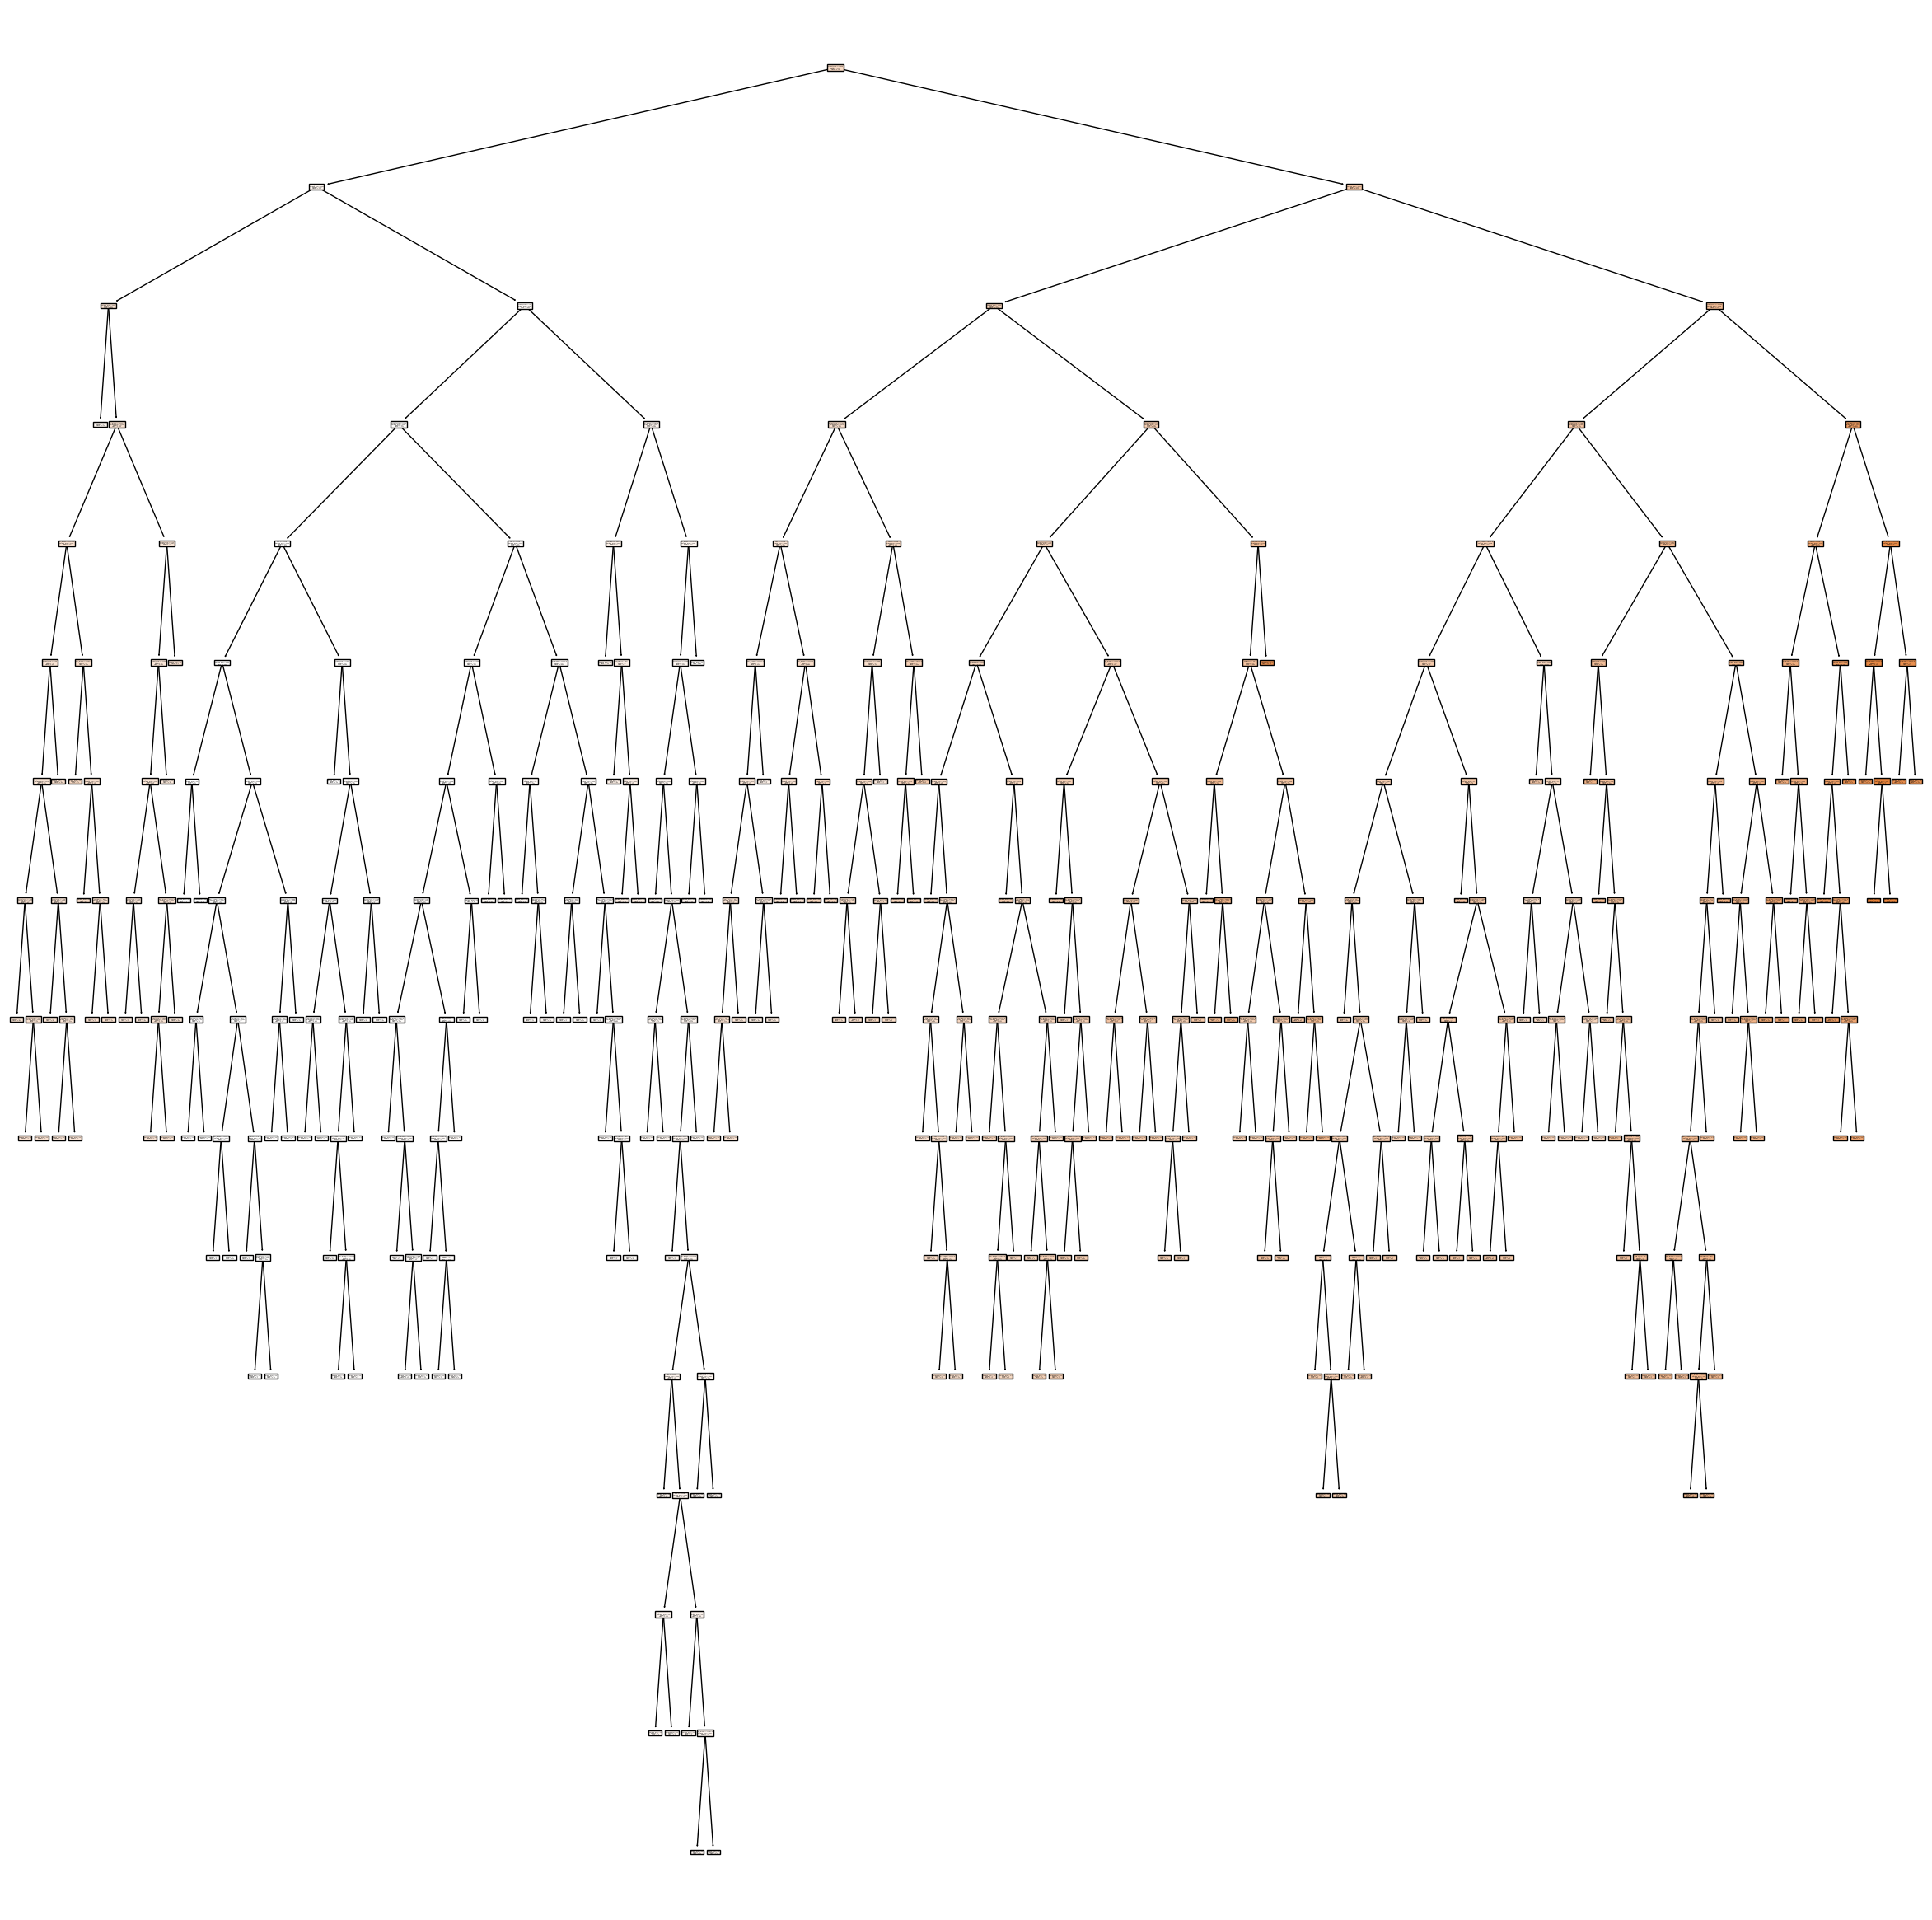

In [59]:
plt.figure(figsize=(30,30))
plot_tree(dtmodel, filled = True, feature_names=x.columns)
plt.show()

#Random forest

In [48]:
rfmodel = RandomForestRegressor()
rfmodel
rfmodel.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
feature_importance = rfmodel.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns , 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending = False)
feature_importance_df

,Feature,Importance
2,Present_Price,0.787605
1,Year,0.138192
0,Car_Name,0.033214
5,Seller_Type,0.021832
3,Kms_Driven,0.014948
4,Fuel_Type,0.002665
6,Transmission,0.001467
7,Owner,0.000077


In [51]:
y_pred2 = rfmodel.predict(x_test)
y_pred2

array([ 8.5776,  4.0505,  0.7671,  5.1855,  0.4263,  0.2465,  2.859 ,
        0.4362,  2.5185,  5.212 ,  0.1639,  1.0336,  2.6404,  3.0145,
       11.2559,  5.819 ,  0.7043,  2.393 ,  4.035 ,  0.7182,  5.753 ,
        2.509 ,  0.2841,  3.015 ,  9.764 ,  4.0295,  1.1263,  3.1474,
        3.1568,  0.4312,  0.4512,  9.4285,  5.3751,  7.0171,  4.8194,
        2.8595,  3.2295,  8.6567,  2.6885,  5.3027,  0.4328,  8.824 ,
        0.4478,  0.1995,  0.6856,  7.5295,  0.4122,  7.562 ,  0.1732,
        3.7911,  6.2497,  0.459 ,  6.4045,  0.4432,  0.4021,  0.5903,
        6.8105])

In [52]:
mse2 = mean_squared_error(y_test,y_pred2)
mse2

0.8363768626315794

In [53]:
r2_2 = r2_score(y_test,y_pred2)
r2_2

0.9226949524115052

In [54]:
rfmodel.score(x_test,y_test)

0.9226949524115052

In [55]:
rfmodel.score(x_train,y_train)

0.9939476975661892